<a href="https://colab.research.google.com/github/AlexJTStudent/AlexJStudent.github.io/blob/main/MLPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
wine_data = pd.read_csv('wine-training.csv')
(wine_data).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline,wine
0,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0
1,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,1
3,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1
4,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,2


In [10]:
# Prepare the data
X = wine_data.drop('wine', axis=1)  # Features (all columns except 'wine')
y = wine_data['wine']  # Target variable ('wine' column)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model (optional)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9166666666666666


In [11]:
# Save predictions to CSV
submission_df = pd.DataFrame(predictions, columns=['Class'])
submission_df.to_csv('wine_predictions.csv', index=False)

Holdout

In [12]:
wine_holdout = pd.read_csv('wine-holdout.csv')

In [18]:
# prompt: make predictions of the wine training dataset against the holdout

# Make predictions on the holdout set
holdout_predictions = model.predict(wine_holdout)

# Create a submission DataFrame for the holdout predictions
holdout_submission_df = pd.DataFrame(holdout_predictions, columns=['Class'])

# Save the holdout predictions to a CSV file
holdout_submission_df.to_csv('wine_holdout_predictions.csv', index=False)


Accuracy on test set: 0.9166666666666666


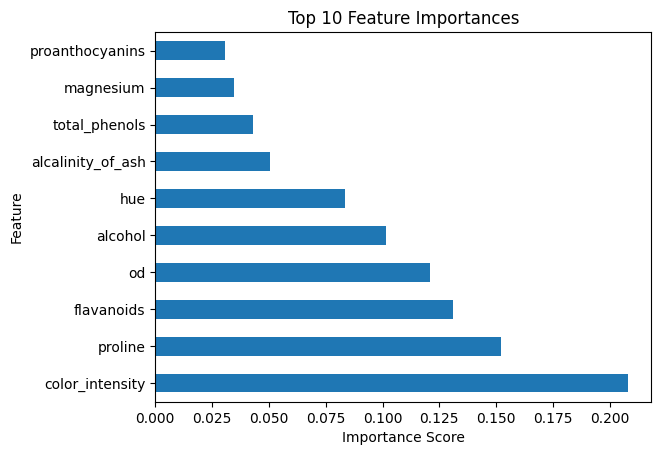

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'model' and 'X' are already defined from your previous code

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a Pandas Series
feat_importances = pd.Series(importances, index=feature_names)

# Plot the horizontal bar chart
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score


# Load the training data
wine_data = pd.read_csv('wine-training.csv')

# Separate features (X) and target (y)
X = wine_data.drop('wine', axis=1)
y = wine_data['wine']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features (if any)
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalization
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Aim for recall
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the holdout set
wine_holdout = pd.read_csv('wine-holdout.csv')
holdout_predictions = model.predict(wine_holdout)

# Create a submission DataFrame
holdout_submission_df = pd.DataFrame(holdout_predictions, columns=['Class'])

# Save the predictions to a CSV file
holdout_submission_df.to_csv('wine_holdout_predictions.csv', index=False)

# Evaluate on test set (optional)
predictions = model.predict(X_test)
recall = recall_score(y_test, predictions, average='weighted')  # Calculate recall
print(f"Recall: {recall}")

Recall: 0.9166666666666666


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# ... (Previous code for model training and prediction) ...

# Evaluate on the test set
test_predictions = model.predict(X_test)

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Print test set metrics
print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Recall: {test_recall}")
print(f"Precision: {test_precision}")
print(f"F1-Score: {test_f1}")
print("Confusion Matrix:")
print(test_confusion_matrix)

# Evaluate on the holdout set
holdout_predictions = model.predict(wine_holdout)  # Assuming 'wine_holdout' is your holdout data

# Since true labels for holdout are usually unknown, we can't calculate metrics
# Instead, focus on saving predictions for submission

# Create a submission DataFrame
holdout_submission_df = pd.DataFrame(holdout_predictions, columns=['Class'])

# Save the predictions to a CSV file
holdout_submission_df.to_csv('wine_holdout_predictions.csv', index=False)

print("\nHoldout predictions saved to 'wine_holdout_predictions.csv'")

Test Set Metrics:
Accuracy: 0.9166666666666666
Recall: 0.9166666666666666
Precision: 0.921875
F1-Score: 0.9166666666666666
Confusion Matrix:
[[7 1 0]
 [0 8 1]
 [0 0 7]]

Holdout predictions saved to 'wine_holdout_predictions.csv'
